In [67]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler 

In [69]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [70]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [71]:

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

c:\Users\girid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [72]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Feature Analysis and Visualisation

In [73]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [74]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot: >

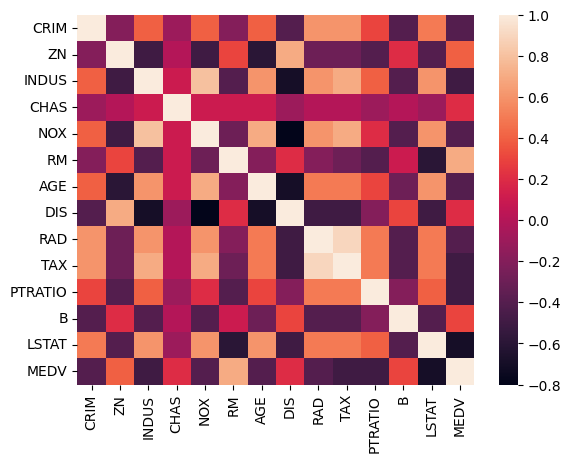

In [75]:
corr_matrix = df.corr().round(1)
sns.heatmap(data=corr_matrix)

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

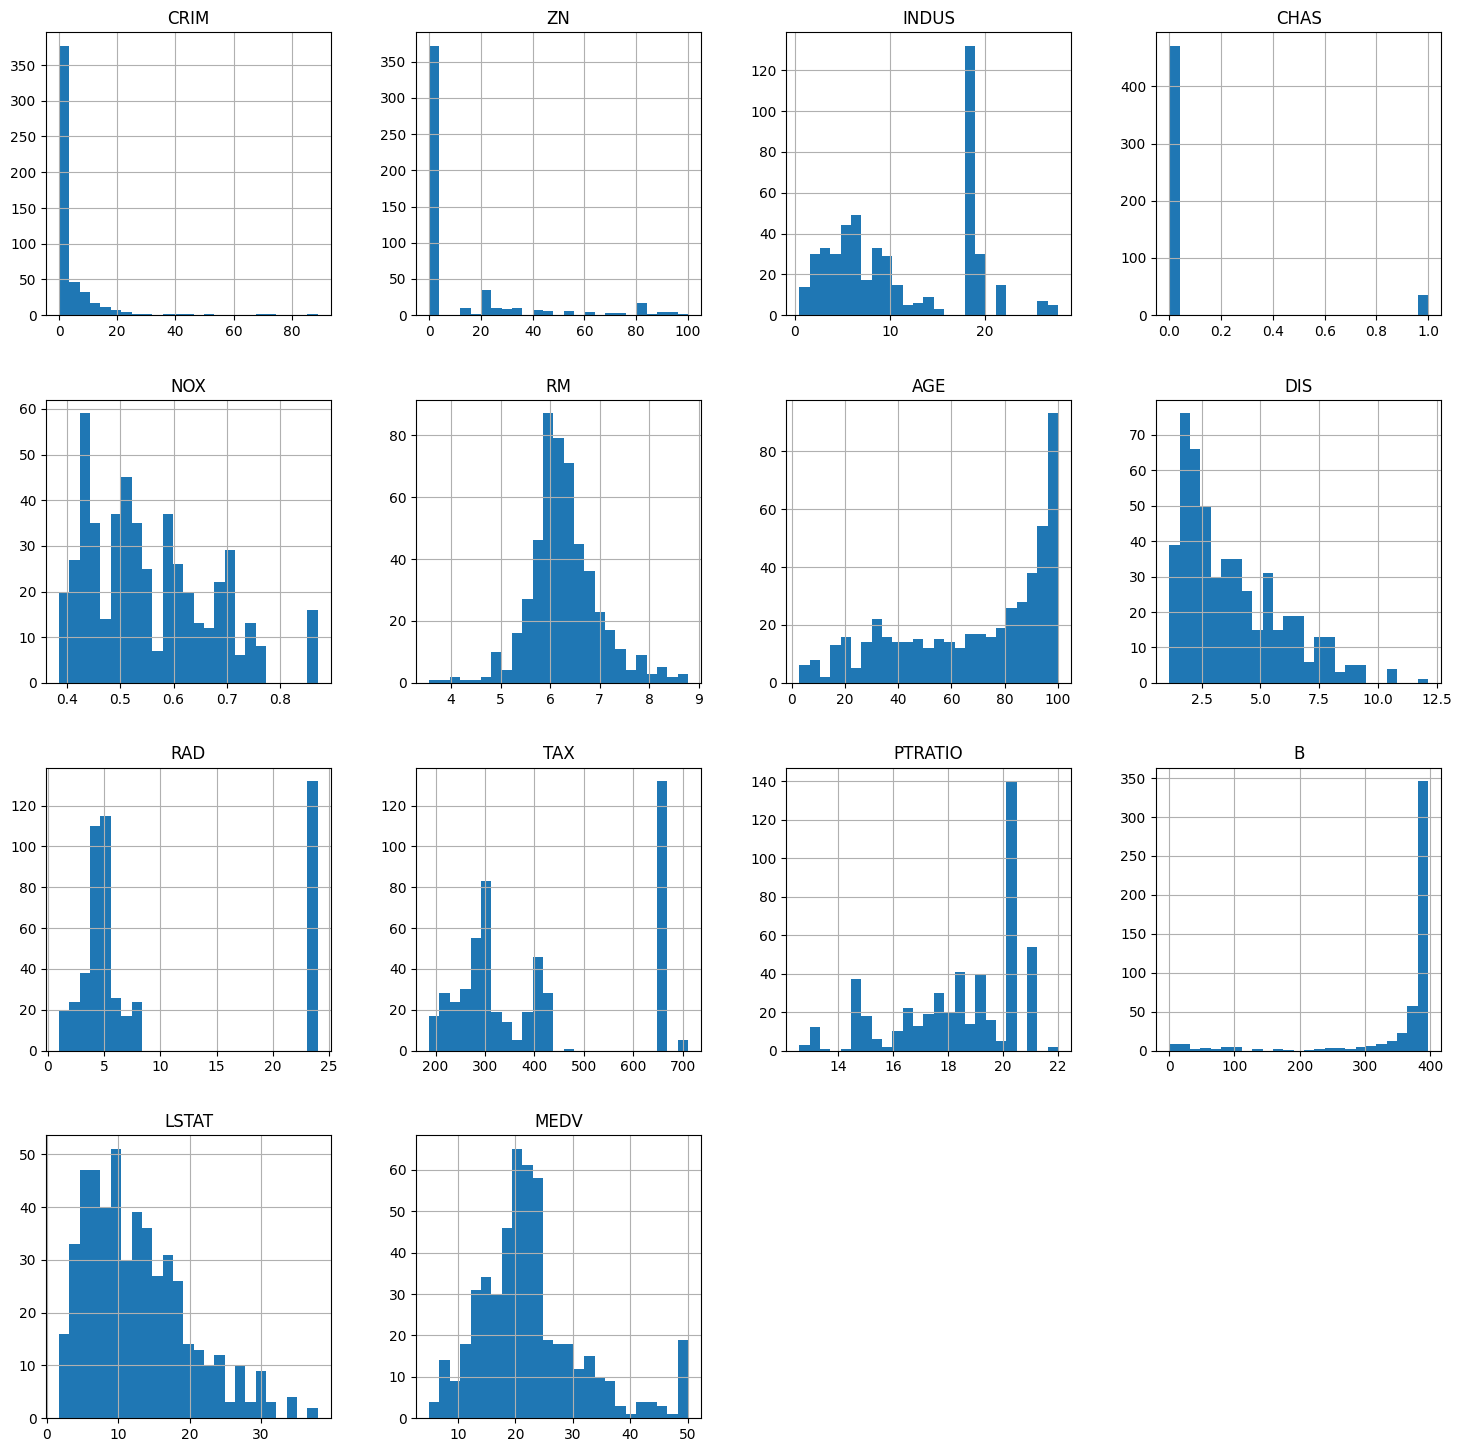

In [76]:
df.hist(figsize=(18,18), bins=25)

IndexError: index 12 is out of bounds for axis 0 with size 12

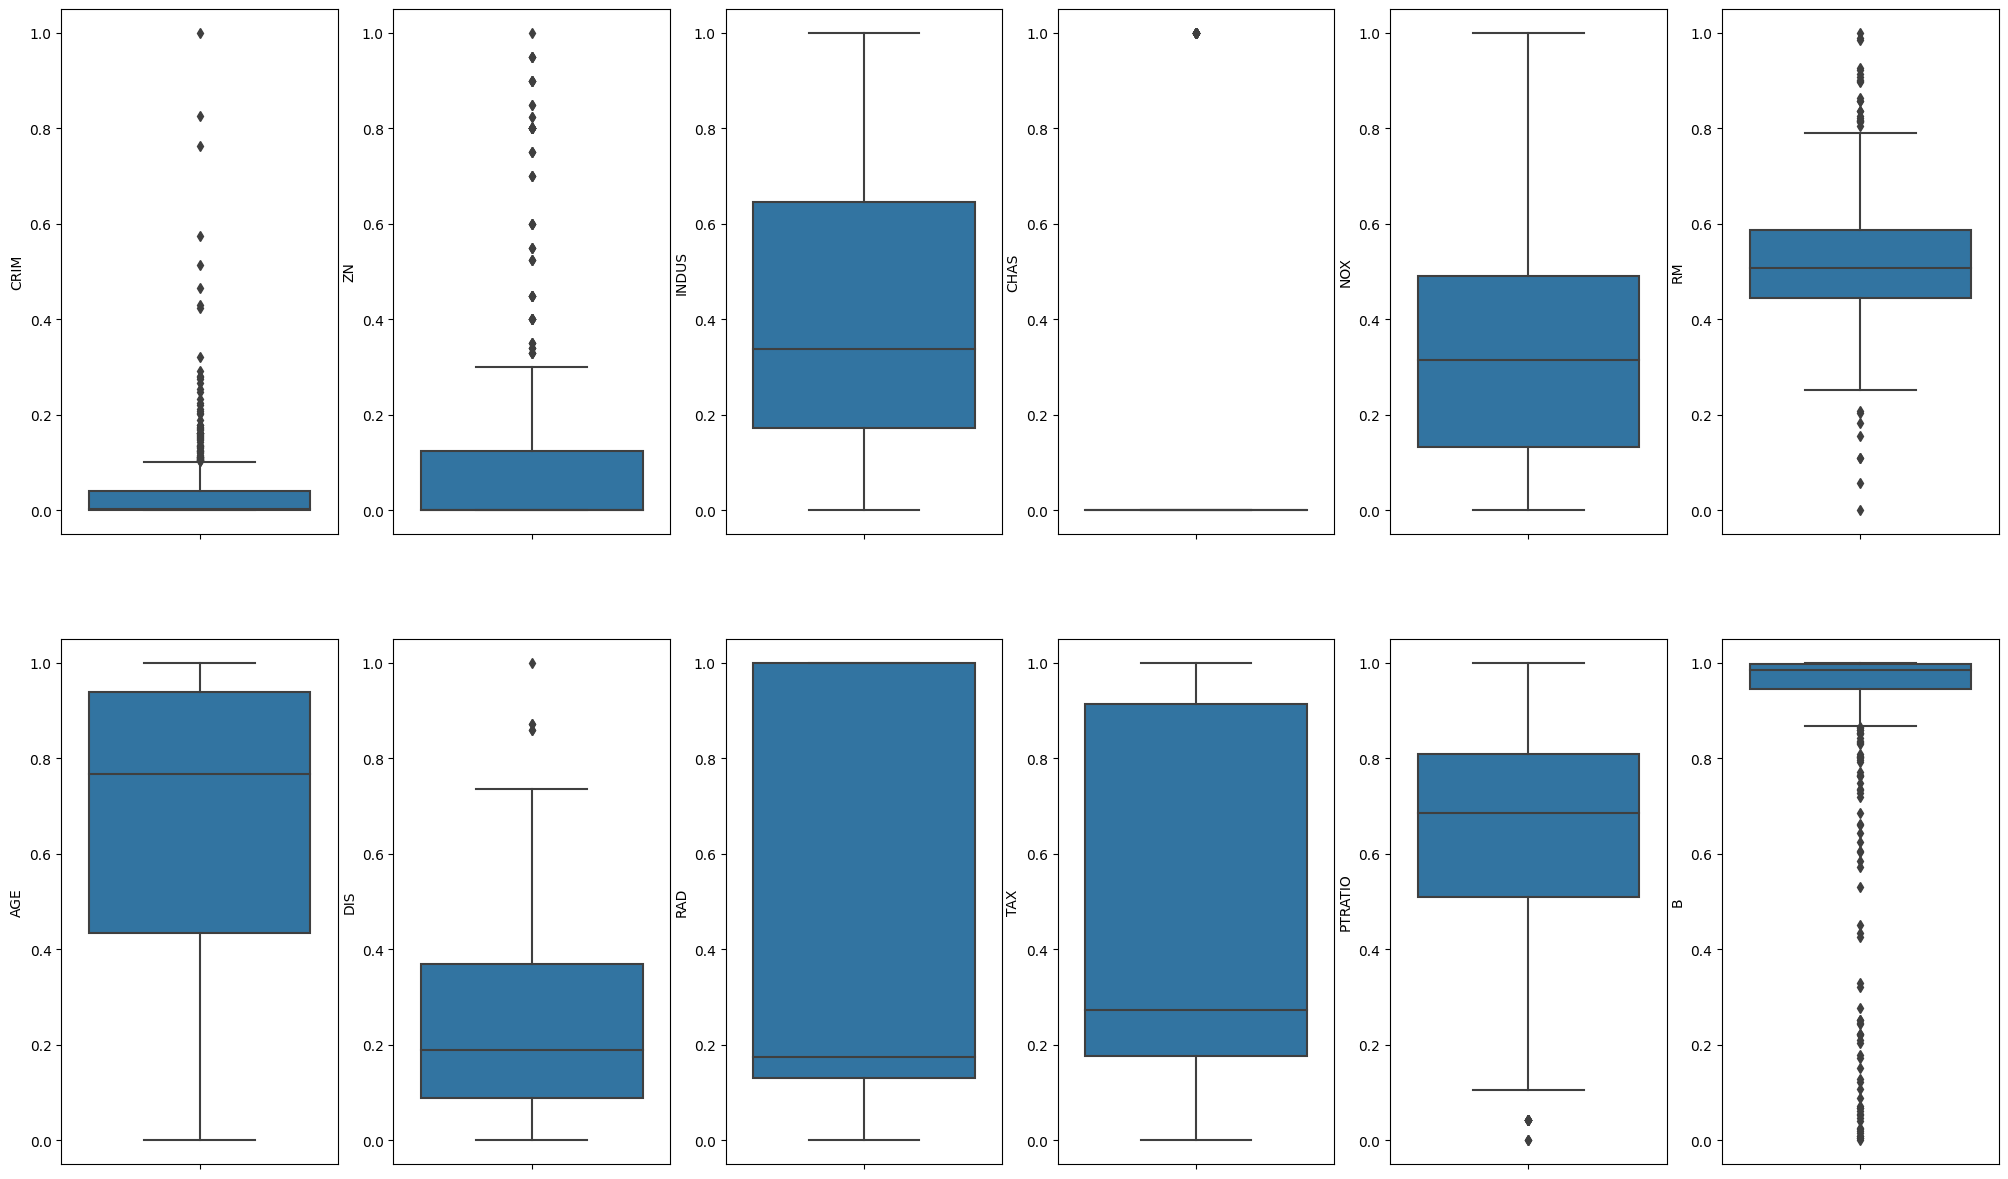

In [32]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(25, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
  sns.boxplot(y=i, data=df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5)
plt.show()

<AxesSubplot: xlabel='ZN', ylabel='MEDV'>

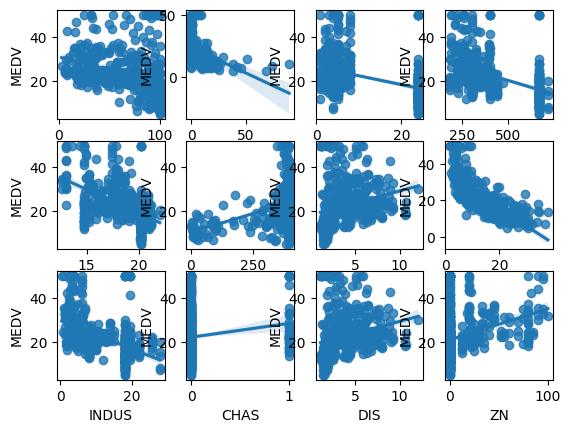

In [77]:
plt.subplot(3,4,1)
sns.regplot(x=df['AGE'],y=df['MEDV'],data=df)
plt.subplot(3,4,2)
sns.regplot(x=df['CRIM'],y=df['MEDV'],data=df)
plt.subplot(3,4,3)
sns.regplot(x=df['RAD'],y=df['MEDV'],data=df)
plt.subplot(3,4,4)
sns.regplot(x=df['TAX'],y=df['MEDV'],data=df)
plt.subplot(3,4,5)
sns.regplot(x=df['PTRATIO'],y=df['MEDV'],data=df)
plt.subplot(3,4,6)
sns.regplot(x=df['B'],y=df['MEDV'],data=df)
plt.subplot(3,4,7)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,8)
sns.regplot(x=df['LSTAT'],y=df['MEDV'],data=df)
plt.subplot(3,4,9)
sns.regplot(x=df['INDUS'],y=df['MEDV'],data=df)
plt.subplot(3,4,10)
sns.regplot(x=df['CHAS'],y=df['MEDV'],data=df)
plt.subplot(3,4,11)
sns.regplot(x=df['DIS'],y=df['MEDV'],data=df)
plt.subplot(3,4,12)
sns.regplot(x=df['ZN'],y=df['MEDV'],data=df)

Preprocessing

In [78]:

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled = scaler.fit_transform(df)
# np.set_printoptions(precision=1)
# print(rescaledX[0:3,:])

In [79]:
df = pd.DataFrame(rescaled,columns=df.columns)
rescaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

In [33]:
for i in df.columns:
  df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in CHAS is 6.92% with count 35
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


Model Training and testing


In [80]:
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,train_size=0.8)

In [82]:
print(len(X_train),len(X_test))

404 102


In [83]:
linearModel = LinearRegression()
supportVectorRegressor = SVR()
knnRegressor = KNeighborsRegressor(n_neighbors=3)

In [84]:
'''

1. Data Preprocessing
2. Linear Regression
3. Lasso Regression
4. Decision Tree Regression
5. Support vector regressor
6. k-fold validation / cross Validation
7. Analyze Scores

Optional:
8. Pipelining

'''

'\n\n1. Data Preprocessing\n2. Linear Regression\n3. Lasso Regression\n4. Decision Tree Regression\n5. Support vector regressor\n6. k-fold validation / cross Validation\n7. Analyze Scores\n\nOptional:\n8. Pipelining\n\n'

In [85]:
linearModel.fit(X_train,y_train)


LinearRegression()

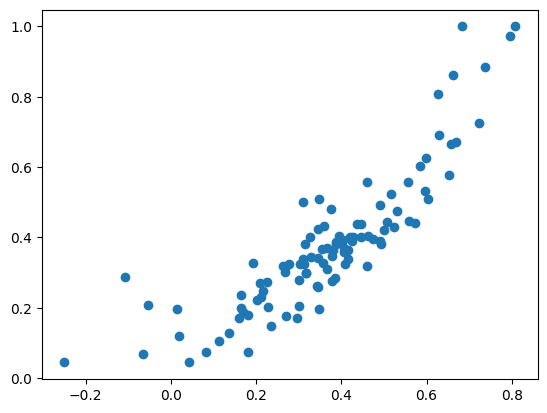

In [86]:
linearPred = linearModel.predict(X_test)
plt.scatter(linearPred,y_test)

In [87]:
knnRegressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

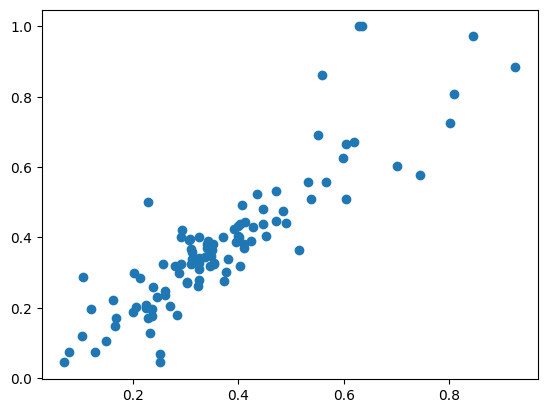

In [88]:
knnPred = knnRegressor.predict(X_test)
plt.scatter(knnPred,y_test)

In [48]:
arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
gsmodel = GridSearchCV(estimator=knnRegressor,
                      param_grid={'n_neighbors':arr},
                       cv = 5
                      )
gsmodel.fit(X_train,y_train)
gsPred = gsmodel.predict(X_test)

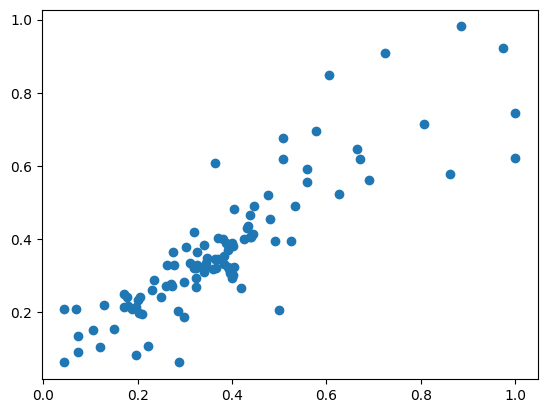

In [49]:
plt.scatter(y_test,gsPred)

In [50]:
r2_score(y_test,gsPred)

0.7529919519074502

In [51]:
gsRes = pd.DataFrame(gsmodel.cv_results_)
gsRes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003200,0.002994,0.003199,0.001599,1,{'n_neighbors': 1},0.771316,0.786270,0.827415,0.410602,0.727511,0.704623,0.150442,2
1,0.002392,0.001953,0.002415,0.001972,2,{'n_neighbors': 2},0.712285,0.726277,0.868271,0.535572,0.837092,0.735899,0.117084,1
2,0.002406,0.001964,0.003193,0.001597,3,{'n_neighbors': 3},0.682157,0.684054,0.800379,0.542747,0.764619,0.694791,0.088789,3
3,0.001595,0.001954,0.003211,0.001606,4,{'n_neighbors': 4},0.629835,0.670730,0.761676,0.550555,0.741974,0.670954,0.076761,4
4,0.002394,0.001955,0.004006,0.000013,5,{'n_neighbors': 5},0.602906,0.669720,0.741643,0.520695,0.754938,0.657980,0.087657,6
5,0.003200,0.001600,0.003994,0.000012,6,{'n_neighbors': 6},0.614703,0.663512,0.728606,0.512321,0.730375,0.649903,0.081269,7
6,0.003198,0.001599,0.004808,0.001597,7,{'n_neighbors': 7},0.591882,0.666963,0.720302,0.583660,0.729687,0.658499,0.061641,5
7,0.003195,0.001598,0.003199,0.001600,8,{'n_neighbors': 8},0.551244,0.669812,0.728188,0.562132,0.721164,0.646508,0.076135,8
8,0.002395,0.001956,0.003211,0.001606,9,{'n_neighbors': 9},0.535882,0.666228,0.712704,0.584314,0.705042,0.640834,0.069487,9
9,0.002393,0.001954,0.004006,0.000017,10,{'n_neighbors': 10},0.540785,0.648701,0.710210,0.595085,0.694110,0.637778,0.062880,10


In [52]:
gsRes[['param_n_neighbors','rank_test_score']].sort_values(by = 'rank_test_score')

,param_n_neighbors,rank_test_score
1,2,1
0,1,2
2,3,3
3,4,4
6,7,5
4,5,6
5,6,7
7,8,8
8,9,9
9,10,10


In [89]:
#decision tree
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [90]:
DTpred = decisionTreeRegressor.predict(X_test)
DTpred


array([0.96222222, 0.48      , 0.41333333, 0.19555556, 0.74888889,
       0.04888889, 0.41333333, 0.42      , 0.47777778, 0.37111111,
       0.64      , 0.35777778, 0.44444444, 0.63111111, 0.40666667,
       0.36      , 0.27111111, 0.22888889, 0.30444444, 1.        ,
       0.22666667, 0.29333333, 0.96222222, 0.35555556, 0.56222222,
       0.07555556, 0.4       , 0.32888889, 0.34888889, 0.51111111,
       0.19111111, 0.22666667, 0.08444444, 0.22222222, 0.42      ,
       0.21111111, 0.37777778, 0.04888889, 1.        , 0.62444444,
       0.18      , 0.21111111, 0.47777778, 0.18666667, 0.42      ,
       0.42      , 0.11555556, 0.30666667, 0.31333333, 0.28444444,
       0.33555556, 0.35777778, 0.35333333, 0.19111111, 0.22      ,
       0.39777778, 0.84      , 0.18666667, 0.41777778, 0.40888889,
       0.36      , 0.39111111, 0.18444444, 0.39555556, 0.33777778,
       0.08444444, 0.31555556, 0.42666667, 0.42888889, 0.36      ,
       0.25333333, 0.44444444, 0.3       , 0.27111111, 1.     

In [91]:
from sklearn.tree import export_text
tree_rules = export_text(decisionTreeRegressor, feature_names=list(X.columns))
print(tree_rules)



|--- RM <= 0.65
|   |--- LSTAT <= 0.35
|   |   |--- DIS <= 0.03
|   |   |   |--- value: [1.00]
|   |   |--- DIS >  0.03
|   |   |   |--- RM <= 0.57
|   |   |   |   |--- LSTAT <= 0.17
|   |   |   |   |   |--- DIS <= 0.30
|   |   |   |   |   |   |--- ZN <= 0.34
|   |   |   |   |   |   |   |--- CRIM <= 0.05
|   |   |   |   |   |   |   |   |--- CHAS <= 0.50
|   |   |   |   |   |   |   |   |   |--- RM <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- B <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- B >  1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- RM >  0.55
|   |   |   |   |   |   |   |   |   |   |--- value: [0.41]
|   |   |   |   |   |   |   |   |--- CHAS >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |--- CRIM >  0.05
|   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |  

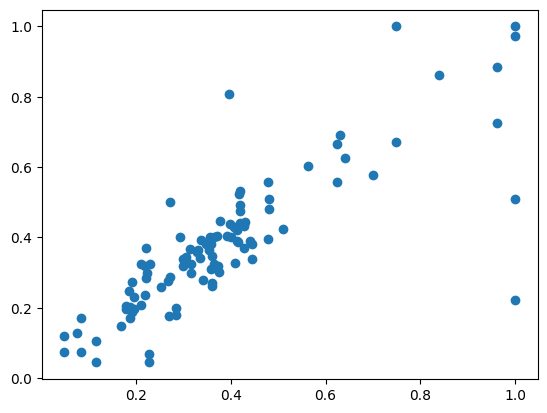

In [92]:
plt.scatter(DTpred, y_test)



In [93]:
#SVR
supportVectorRegressor = SVR()
supportVectorRegressor.fit(X_train,y_train)

SVR()

In [94]:
svrPred = supportVectorRegressor.predict(X_test)
svrPred


array([0.81791748, 0.57828704, 0.46584861, 0.09457329, 0.70071874,
       0.09263004, 0.44083455, 0.57560641, 0.44630056, 0.38569141,
       0.64893214, 0.40759182, 0.34787704, 0.70438297, 0.49562259,
       0.24701339, 0.16998869, 0.3054261 , 0.17360517, 0.28560135,
       0.17740004, 0.31330612, 0.86639091, 0.40626988, 0.64430722,
       0.10487003, 0.44336277, 0.34905182, 0.45680936, 0.3869725 ,
       0.32913666, 0.21047374, 0.27287395, 0.2352337 , 0.50601673,
       0.29751008, 0.53996928, 0.14625505, 0.90808537, 0.6774995 ,
       0.31143796, 0.15203644, 0.54200972, 0.19147889, 0.50165318,
       0.54442169, 0.12140553, 0.36005574, 0.3758932 , 0.1965763 ,
       0.29634522, 0.35581865, 0.39203942, 0.23677758, 0.2905655 ,
       0.46696011, 0.77481321, 0.19579569, 0.54416681, 0.34509348,
       0.28275315, 0.44364453, 0.20658632, 0.70444268, 0.50851885,
       0.1859408 , 0.30927175, 0.477031  , 0.37941445, 0.45088477,
       0.27463935, 0.45263328, 0.29328234, 0.21526567, 0.39901

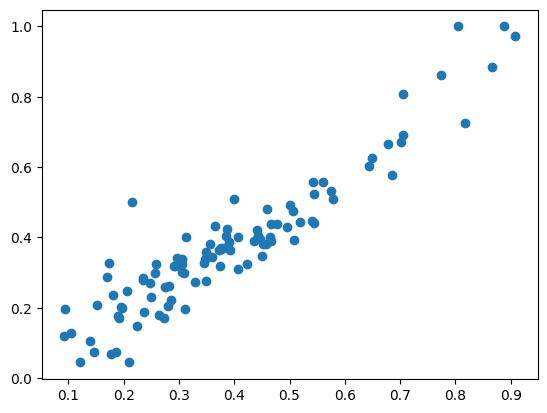

In [95]:
plt.scatter(svrPred,y_test)

In [96]:
r2_score(y_test, linearPred)

0.7334492147453071

In [97]:
r2_score(y_test,knnPred)

0.7787859232278315

In [98]:
r2_score(y_test,DTpred)

0.603111685718716

In [99]:
r2_score(y_test,svrPred)

0.8685201163347536